# EDA on insurance fraud dataset

### General Information about dataset

- months_as_customer: It denotes the number of months for which the customer is associated with the insurance company.

- age: continuous. It denotes the age of the person.

- policy_number: The policy number.

- policy_bind_date: Start date of the policy.

- policy_state: The state where the policy is registered.

- policy_csl-combined single limits. How much of the bodily injury will be covered from the total damage. 
`Split Limit Liability Coverage

A Split Limit Liability auto policy is split into three parts:

Bodily Injury Per Person
Total Bodily Injuries Per Accident
Property Damage.
An example of a standard Split Limit policy may look like this:  100/300/100.  In this example, if you caused an accident, the maximum limit your insurance company will pay for Bodily Injury is: $100,000 limit per person, max $300,000 per accident, and up to $100,000 for any property damage (i.e., cars, buildings, fences you hit).

Combined Single Limit Liability Coverage (CSL)


This type of auto insurance coverage is a combination of all the liability limits (Bodily injury AND Property Damage). There is not a split differential between the three main components.  A combined single limit is exactly what the name implies; liability is combined into one single limit. So if you purchase a $300 CSL policy, your policy will cover up to $300,000 total for any bodily injury or property damage`

https://www.berkshireinsuranceservices.com/arecombinedsinglelimitsbetter  

- policy_deductable: The amount paid out of pocket by the policy-holder before an insurance provider will pay any expenses.

- policy_annual_premium: The yearly premium for the policy.

- umbrella_limit: An umbrella insurance policy is extra liability insurance coverage that goes beyond the limits of the insured's homeowners, auto or watercraft insurance. It provides an additional layer of security to those who are at risk of being sued for damages to other people's property or injuries caused to others in an accident.

- insured_zip: The zip code where the policy is registered.

- insured_sex: It denotes the person's gender.

- insured_education_level: The highest educational qualification of the policy-holder.

- insured_occupation: The occupation of the policy-holder.

- insured_hobbies: The hobbies of the policy-holder.

- insured_relationship: Dependents on the policy-holder.

- capital-gain: It denotes the monitory gains by the person.

- capital-loss: It denotes the monitory loss by the person.

- incident_date: The date when the incident happened.

- incident_type: The type of the incident.

- collision_type: The type of collision that took place.

- incident_severity: The severity of the incident.

- authorities_contacted: Which authority was contacted.

- incident_state: The state in which the incident took place.

- incident_city: The city in which the incident took place. 

- incident_location: The street in which the incident took place.

- incident_hour_of_the_day: The time of the day when the incident took place.

- property_damage: If any property damage was done.

- bodily_injuries: Number of bodily injuries.

- Witnesses: Number of witnesses present.

- police_report_available: Is the police report available.

- total_claim_amount: Total amount claimed by the customer.

- injury_claim: Amount claimed for injury

- property_claim: Amount claimed for property damage.

- vehicle_claim: Amount claimed for vehicle damage.

- auto_make: The manufacturer of the vehicle

- auto_model: The model of the vehicle. 

- auto_year: The year of manufacture of the vehicle. 

In [39]:
# Importing necessary Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Importing dataset
data = pd.read_csv('../notebooks/data/insuranceFraud.csv')

In [4]:
# Taking preview of dataset
data.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
# Getting basic information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# Getting basic description about our dataset
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [7]:
# In this dataset missing values have been denoted by '?'
# we need to replace ? with NaN for them to be imputed down the line.
data=data.replace('?',np.nan)

In [8]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [9]:
len(data.columns)

39

In [10]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

#### We have a total of 39 columns in our dataset

In [11]:
# list of columns not necessary for prediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [12]:
# dropping the unnecessary columns
data.drop(columns=cols_to_drop,inplace=True)

In [13]:
data.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [14]:
# checking the data after dropping the columns
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [15]:
# checking for missing values
data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [16]:
# checking for the number of categorical and numerical columns
categorical_columns = [column for column in data.columns if data[column].dtype == 'object']
numerical_columns = [column for column in data.columns if data[column].dtype != 'object']

In [17]:
data[categorical_columns].head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,NaN,Minor Damage,Police,NaN,NaN,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NaN,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,NaN,Minor Damage,NaN,NO,NO,N


In [18]:
data[numerical_columns].head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [19]:
# All the categorical columns
categorical_columns

['policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'property_damage',
 'police_report_available',
 'fraud_reported']

In [20]:
# All the numerical columns
numerical_columns

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

In [21]:
# Before imputing missing values we need to know that all the missing values to be filled are categorical 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
# data['collision_type'] = 
data['collision_type'] = imputer.fit_transform(data['collision_type'].values.reshape(-1, 1)).reshape(len(data['collision_type']))
data['authorities_contacted'] = imputer.fit_transform(data['authorities_contacted'].values.reshape(-1, 1)).reshape(len(data['authorities_contacted']))
data['property_damage'] = imputer.fit_transform(data['property_damage'].values.reshape(-1, 1)).reshape(len(data['property_damage']))
data['police_report_available'] = imputer.fit_transform(data['police_report_available'].values.reshape(-1, 1)).reshape(len(data['police_report_available']))


In [22]:
# data after imputing missing values
data.isnull().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [23]:
plt.style.use('seaborn-v0_8-dark-palette')

### Univariate Analysis for Numerical Columns

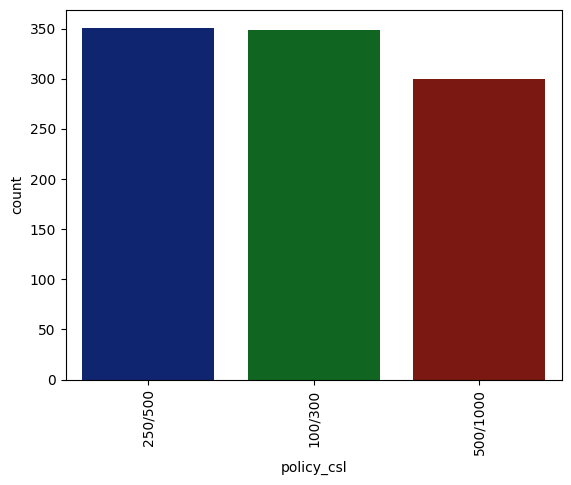

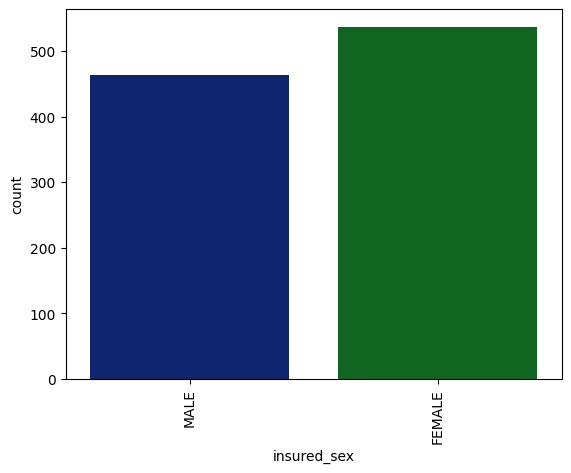

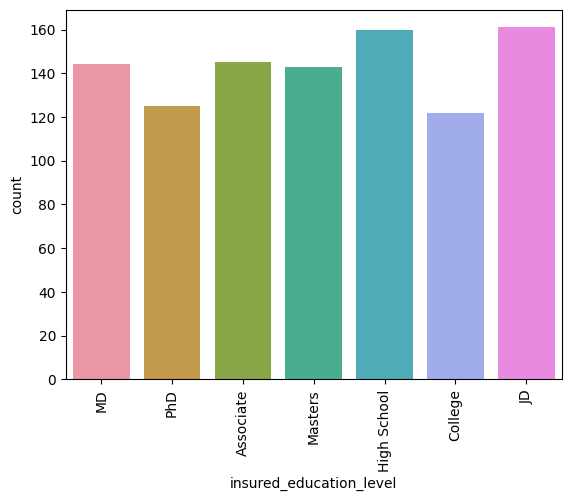

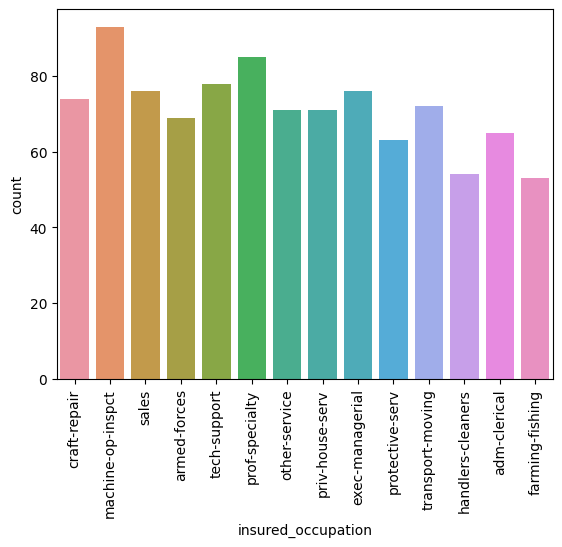

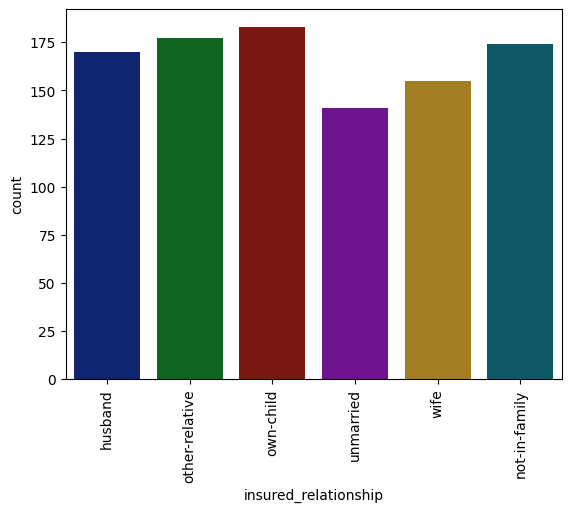

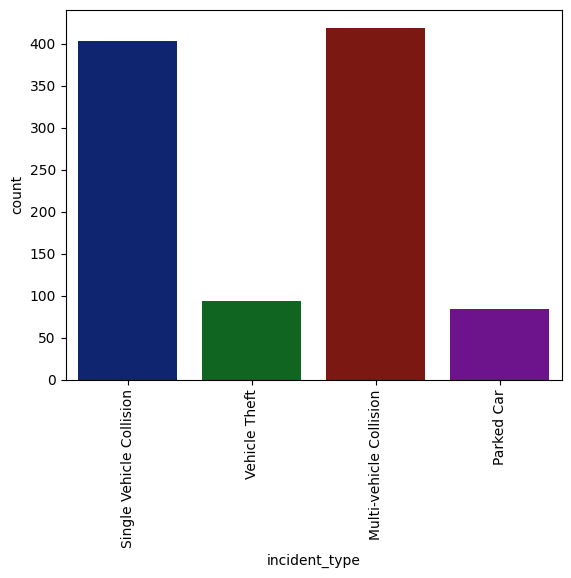

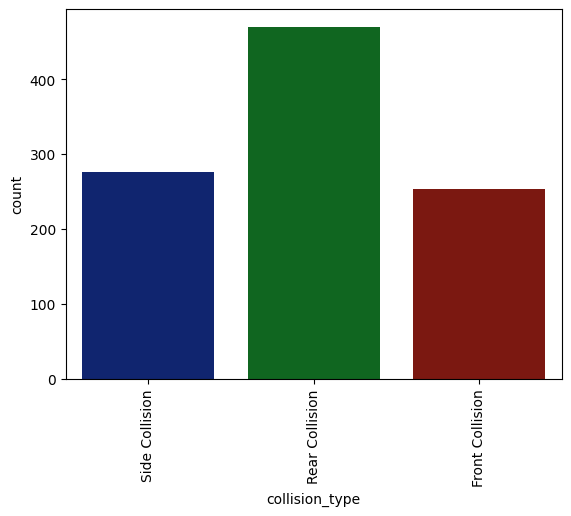

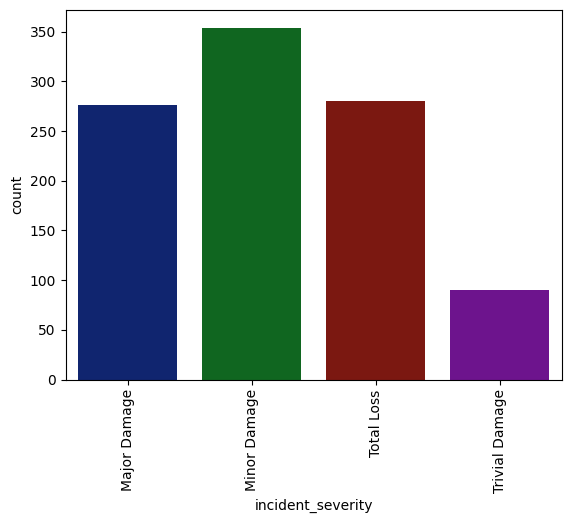

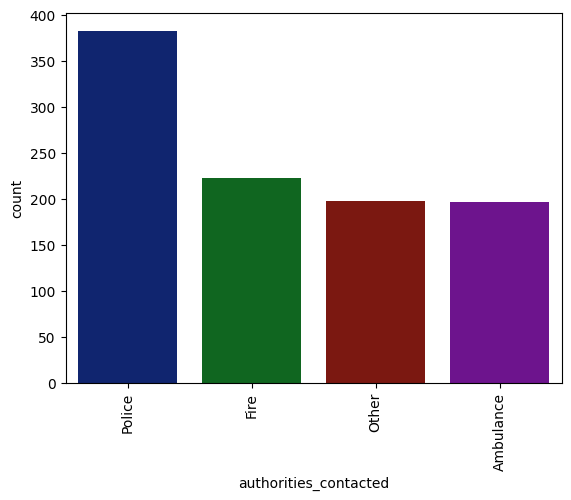

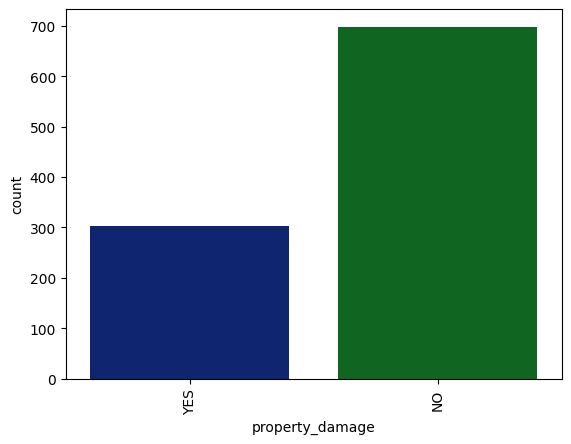

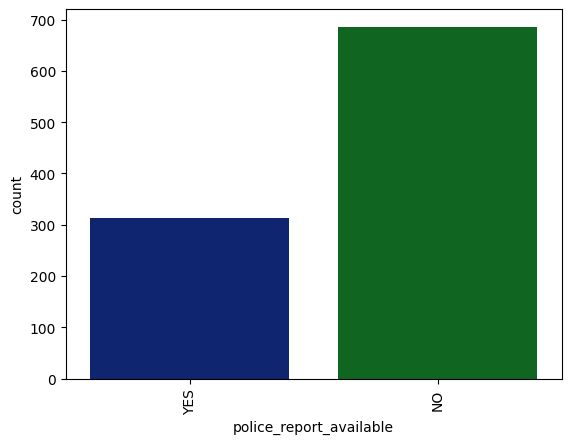

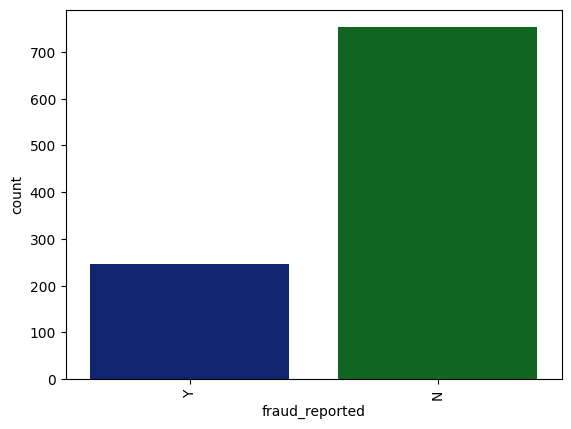

In [40]:
# %%capture
for i in categorical_columns:
    sns.countplot(data = data,x=data[i])
    # plt.title(i)
    plt.xticks(rotation='vertical')
    plt.show()
plt.show()

## Insights from Categorical Features

- Maximum number of policy_csl for insurance claims received is for category 100/300 and 250/500 and little less for 500/1000

- Female are more to claim insurance than men

- Insured Education level count ranges b/w 120-160 and do not vary much

- Most of the people claiming insurance are machine operation inspector and we can see almost uniform distribution for occupations

- Most of the people have child and people who are unmarried are less and the distribution seems to be quite uniform

- Maximum insurence claism have occured due to accident due to multi-vehicle collision and a little less by single-vehicle collision and very less insurance claims have occured due to theft_car and parked_car

- Maximum accident due to collision happened due to rear_collision and almost half the no of rear_collision got to collision by side-collision and fromt-collision

- In maximum insurance claims minor damages to vehicle have come around 350 cases and 280 cases have claimed insurance for major damages or total loss and very few around 90 for trivial damage

- Maximum time after an incident police have been contacted and half the figures of police have been contacted to ambulance,fire police and others

- Maximum of the insurance claims does not involve in any property damage around 700 cases but aroun 300 of the cases involve property damage

- In maximum if the incidents around 700, police report is not available but in 300 cases police report is available, that means most of the people do not complain a police complaint

- Our dataset have around 270 incurance claims that are fraud 

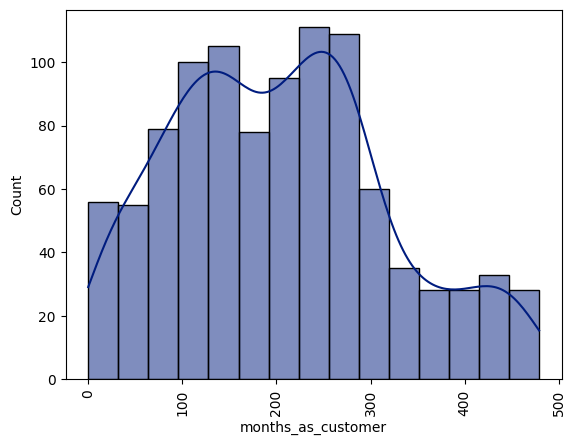

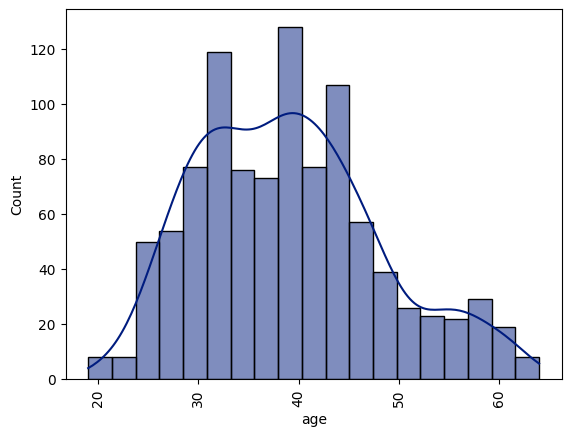

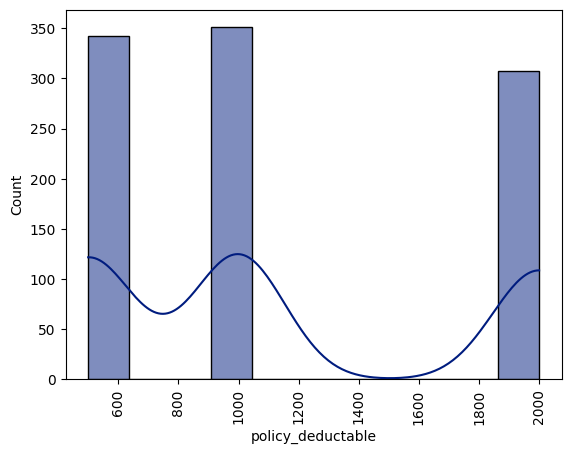

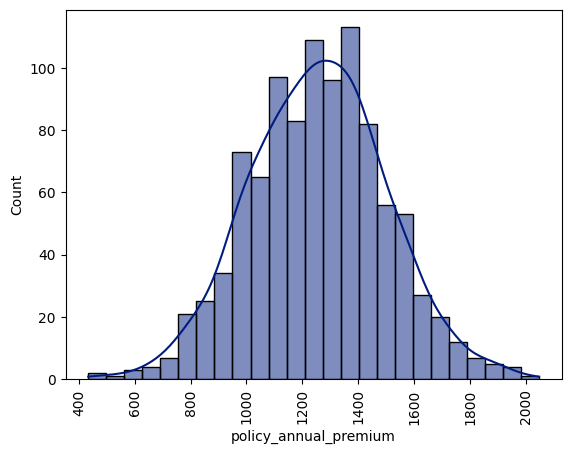

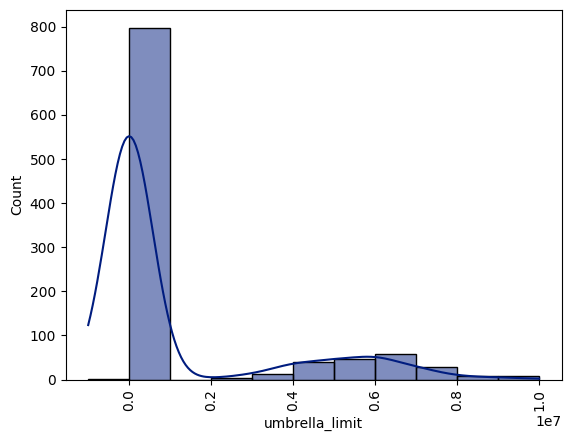

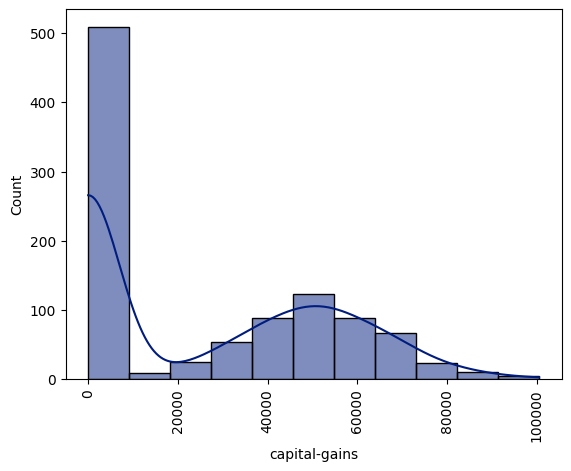

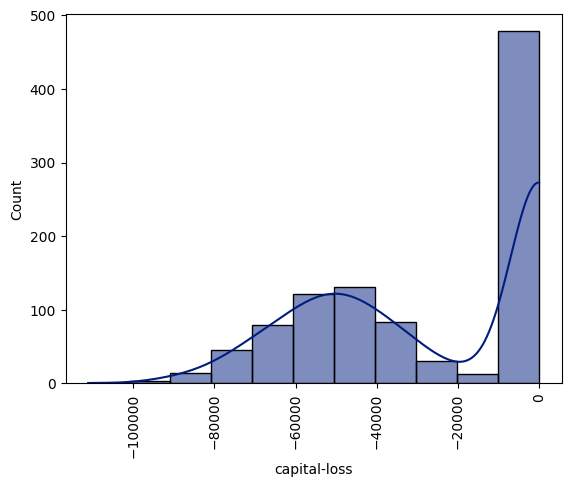

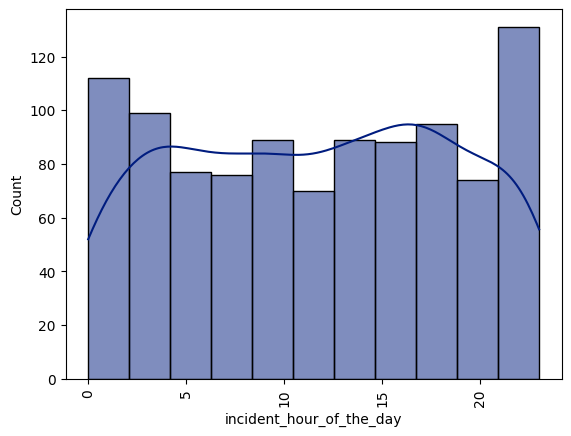

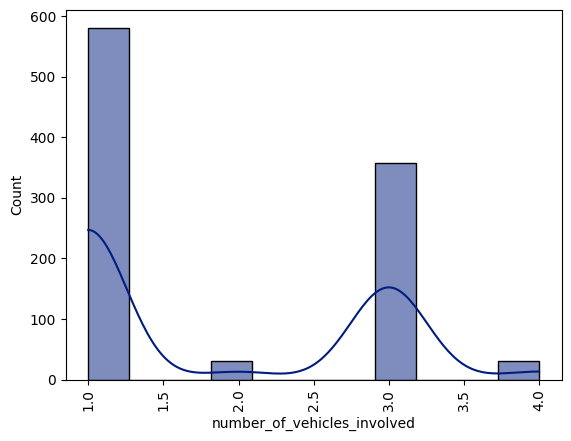

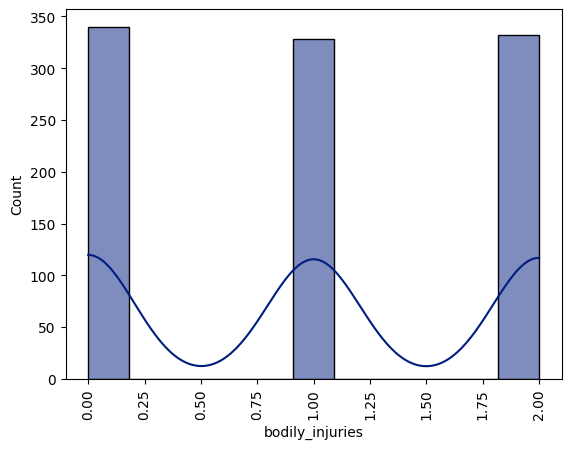

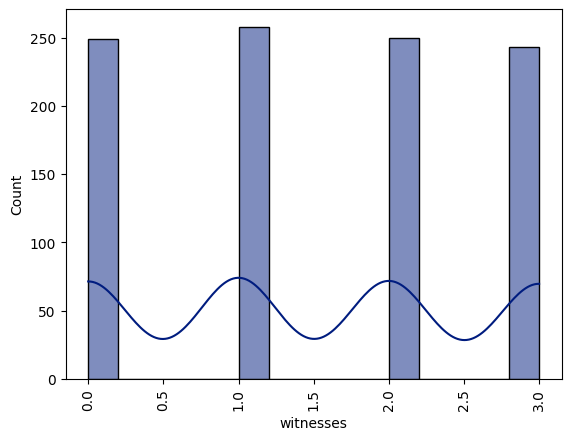

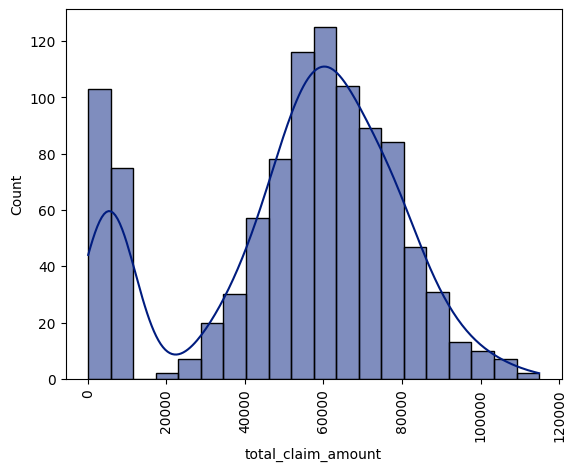

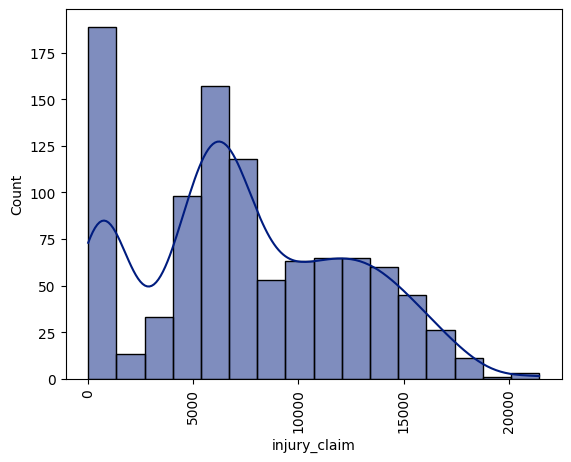

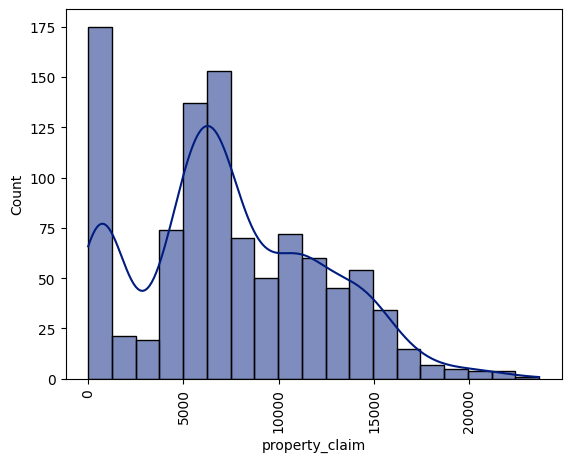

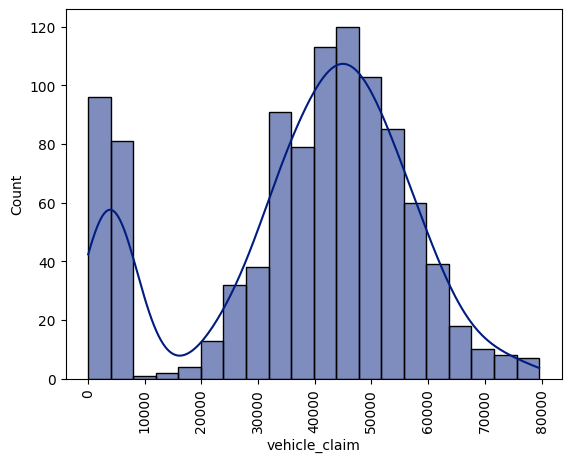

In [42]:
for i in numerical_columns:
    sns.histplot(data = data,x=data[i] ,kde=True)
    # plt.title(i)
    plt.xticks(rotation='vertical')
    plt.show()
plt.show()